In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv


# Loading Datasets and Importing Libraries 

In [2]:
# Importing Tensorflow and the required visualization libraries
import tensorflow as tf
tf.config.experimental_run_functions_eagerly(True)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Loading the Dataset
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')


In [3]:
# Seperating the independent feature as y
y = train['label']
train = train.drop('label', axis =1)

# Visualizing Data

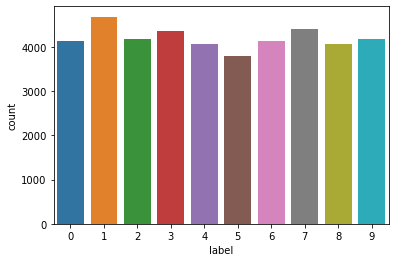

In [4]:
#Visualizing the Distribution of digits in labels
sns.countplot(y)

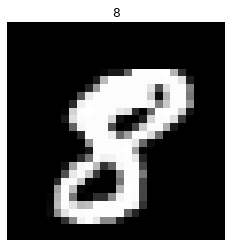

In [5]:
#Visualing an example 
img = train.iloc[10].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(y.iloc[10])
plt.axis("off")
plt.show()

# Preprocessing Data

In [6]:
#Preprocessing the Data
train=train/225.0
test = test/225.0
train = np.array(train)
test= np.array(test)
train = train.reshape(train.shape[0], 28, 28,1)
test = test.reshape(test.shape[0], 28, 28,1)

#Splitting the data into training and validation 
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(train, y, test_size=0.2)

#Converting the train and validation labels to one-hot encodings
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes=10)
Y_val = tf.keras.utils.to_categorical(Y_val, num_classes=10)

# Building, Compiling and Training model

In [7]:
#Preparing a CNN model architecture
model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(32, (5,5), activation='relu', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Conv2D(64, (5,5), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            
            
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10, activation='softmax')
    ])


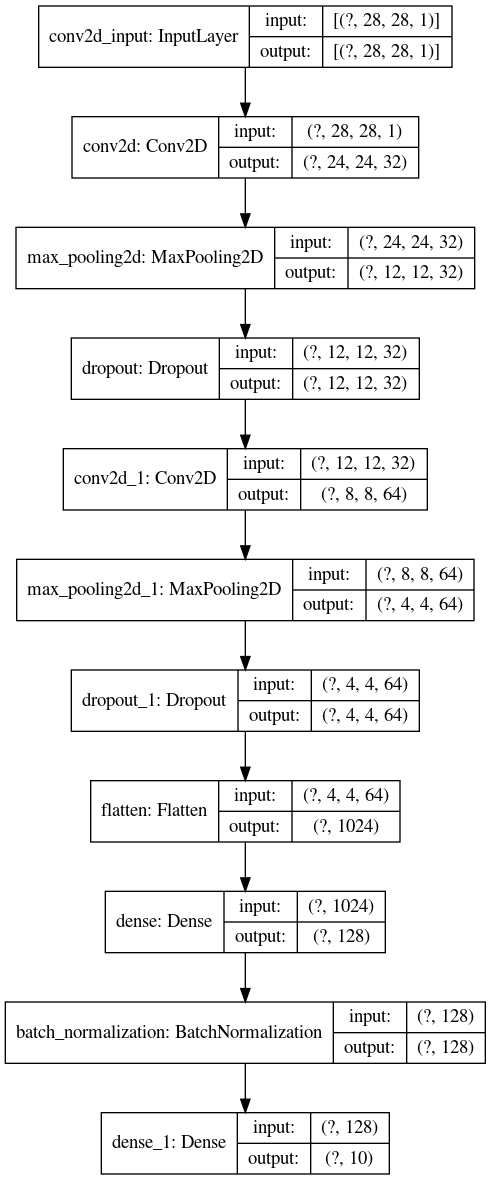

In [8]:
#Getting the model framework/summary 
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image("model.png")

In [9]:
#Compiling the model
model.compile(optimizer= tf.keras.optimizers.SGD(lr=0.1, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
#Data augmentation to prevent overfitting
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30, 
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1,)  

In [11]:
#Training the model
history = model.fit_generator(datagen.flow(X_train, Y_train,batch_size=64),validation_data=(X_val, Y_val),epochs=15,steps_per_epoch=X_train.shape[0] // 64)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Epoch 1/15
525/525 [==============================] - 49s 94ms/step - loss: 0.5608 - accuracy: 0.8173 - val_loss: 0.0877 - val_accuracy: 0.9740
Epoch 2/15
525/525 [==============================] - 47s 90ms/step - loss: 0.2078 - accuracy: 0.9348 - val_loss: 0.0682 - val_accuracy: 0.9804
Epoch 3/15
525/525 [==============================] - 47s 89ms/step - loss: 0.1687 - accuracy: 0.9485 - val_loss: 0.0588 - val_accuracy: 0.9812
Epoch 4/15
525/525 [==============================] - 47s 89ms/step - loss: 0.1450 - accuracy: 0.9550 - val_loss: 0.0558 - val_accuracy: 0.9851
Epoch 5/15
525/525 [==============================] - 47s 89ms/step - loss: 0.1308 - accuracy: 0.9607 - val_loss: 0.0504 - val_accuracy: 0.9856
Epoch 6/15
525/525 [==============================] - 48s 92ms/step - loss: 0.1164 - accuracy: 0.9641 - val_loss: 0.0399 - val_accuracy: 0.9868
Epoch 7/15
525/525 [==============================] - 47s 90ms/step - loss: 0.1139 - accuracy: 0.9648 - val_loss: 0.0409 - val_accuracy:

# Evaluating Results

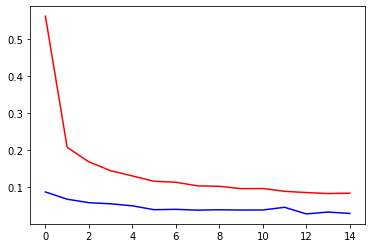

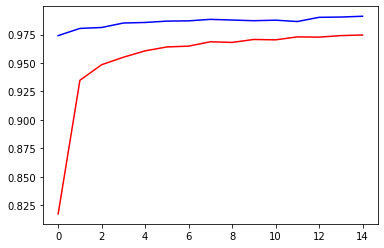

In [12]:
#Comparing losses and accuraries 
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.show()
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.show()

In [13]:
#Plotting Confusion Matrix
y_pred1 = model.predict(X_val)
y_pred1 = np.argmax(y_pred1, axis=1)
y_true = np.argmax(Y_val, axis=1)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred1)
print(cm)

[[837   0   0   0   0   0   1   0   0   0]
 [  0 938   0   0   0   2   0   3   0   0]
 [  0   1 833   1   0   0   0   1   0   0]
 [  0   0   1 827   0   2   0   2   0   0]
 [  2   0   3   0 819   0   1   0   2   5]
 [  0   0   0   0   0 783   2   0   1   0]
 [  0   0   0   0   0   2 829   0   1   0]
 [  0   3  11   0   1   0   0 899   0   1]
 [  0   0   2   1   0   1   0   1 800   3]
 [  0   1   2   1   3   5   0   5   1 760]]


# Saving the Predictions

In [14]:
#Predicting and Saving it as a CSV file
y_pred = model.predict(test)
y_pred = np.argmax(y_pred, axis=1)
y_pred = pd.Series(y_pred, name='Label')
sub = pd.concat([pd.Series(range(1, 28001), name="ImageId"), y_pred], axis=1)
sub.to_csv('/kaggle/working/RESULT.csv', index=False)

# Please do upvote the kernel if you like my work and share your views in the comments.

# Good Day! :)